# DX 704 Week 3 Project

This week's project will give you practice with optimizing choices for bandit algorithms.
You will be given access to the bandit problem via a blackbox object, and you will investigate the bandit rewards to pick a suitable algorithm.

The full project description, a template notebook and supporting code are available on GitHub: [Project 3 Materials](https://github.com/bu-cds-dx704/dx704-project-03).


## Example Code

You may find it helpful to refer to these GitHub repositories of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples
* https://github.com/bu-cds-omds/dx603-examples
* https://github.com/bu-cds-omds/dx704-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Part 1: Pick a Bandit Algorithm

Experiment with the multi-armed bandit interface using seed 0 to learn about the distribution of rewards and decide what kind of bandit algorithm will be appropriate.
A histogram will likely be helpful.

In [1]:
# DO NOT CHANGE

import numpy as np

class BanditProblem(object):
    def __init__(self, seed):
        self.seed = seed
        self.rng = np.random.default_rng(seed)

        self.num_arms = 3
        self.ns = self.rng.integers(low=1, high=10, size=self.num_arms)
        self.ps = self.rng.uniform(low=0.2, high=0.4, size=self.num_arms)

    def get_num_arms(self):
        return self.num_arms

    def get_reward(self, arm):
        if arm < 0 or arm >= self.num_arms:
            raise ValueError("Invalid arm")

        x = self.rng.uniform()
        x *= self.rng.binomial(self.ns[arm], self.ps[arm])

        return x


In [2]:
bandit0 = BanditProblem(0)

In [3]:
bandit0.get_num_arms()

3

In [4]:
bandit0.get_reward(arm=0)

1.8255111545554434

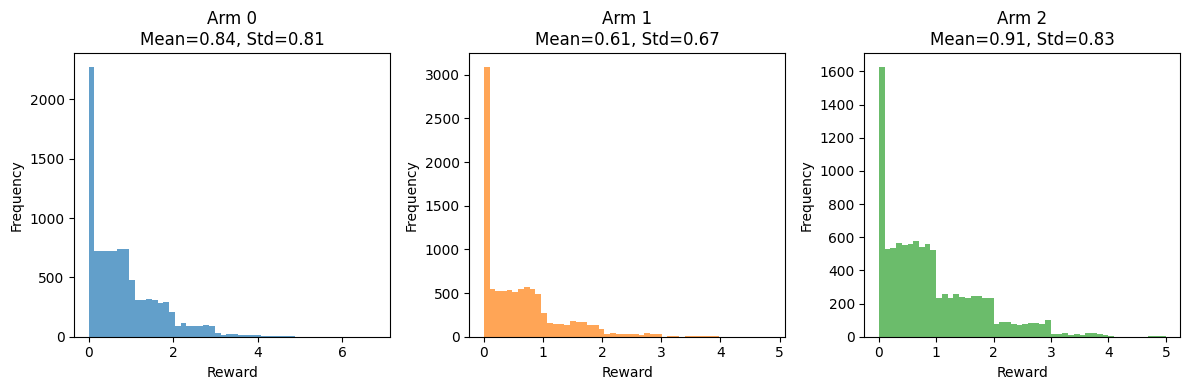

In [5]:
# YOUR CHANGES HERE

import matplotlib.pyplot as plt

# Initialize bandit
bandit0 = BanditProblem(0)

# Number of samples per arm
n_samples = 10000

# Store rewards for each arm
rewards = {arm: [] for arm in range(bandit0.get_num_arms())}

# Collect rewards
for arm in rewards:
    for _ in range(n_samples):
        rewards[arm].append(bandit0.get_reward(arm))

# Plot histograms
plt.figure(figsize=(12, 4))
for arm in rewards:
    plt.subplot(1, 3, arm + 1)
    plt.hist(rewards[arm], bins=50, alpha=0.7, color=f"C{arm}")
    plt.title(f"Arm {arm}\nMean={np.mean(rewards[arm]):.2f}, Std={np.std(rewards[arm]):.2f}")
    plt.xlabel("Reward")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Based on your investigation, pick an appropriate bandit algorithm to implement from the algorithms covered this week.
Write a file "algorithm-choice.txt" that states your choice and gives a few sentences justifying your choice and rejecting the alternatives.
Keep your explanation concise; overly verbose responses will be penalized.

In [6]:
content = """I chose the Upper Confidence Bound algorithm.

from the Bandit Algorithims file, I read that Upper Confidence Bound Algorithm says it behaves well when there are more than two arms. Based off our histogram diagrams, we can clearly see  that the reward distributions overlap and have high variance. UCB is good in this case because it tries all arms enough times and focuses more on the ones that look promising, without ignoring others too early
"""
with open("algorithm-choice.txt", "w") as f:
    f.write(content)

## Part 2: Implement Bandit

Based on your decision, implement an appropriate bandit algorithm and pick 1000 actions using seed 2025002.

In [7]:
# YOUR CHANGES HERE

import numpy as np

class BanditProblem(object):
    def __init__(self, seed):
        self.seed = seed
        self.rng = np.random.default_rng(seed)

        self.num_arms = 3
        self.ns = self.rng.integers(low=1, high=10, size=self.num_arms)
        self.ps = self.rng.uniform(low=0.2, high=0.4, size=self.num_arms)

    def get_num_arms(self):
        return self.num_arms

    def get_reward(self, arm):
        if arm < 0 or arm >= self.num_arms:
            raise ValueError("Invalid arm")

        x = self.rng.uniform()
        x *= self.rng.binomial(self.ns[arm], self.ps[arm])

        return x



bandit = BanditProblem(2025002)
num_arms = bandit.get_num_arms()
n_rounds = 1000

counts = np.zeros(num_arms)  # Number of times each arm was pulled
sums = np.zeros(num_arms)    # Sum 
actions = []
rewards = []


for arm in range(num_arms):
    reward = bandit.get_reward(arm)
    counts[arm] += 1
    sums[arm] += reward
    actions.append(arm)
    rewards.append(reward)


for t in range(num_arms, n_rounds):
    ucb_values = np.zeros(num_arms)
    total_counts = np.sum(counts)

    for arm in range(num_arms):
        avg_reward = sums[arm] / counts[arm]
        confidence = np.sqrt((2 * np.log(total_counts)) / counts[arm])
        ucb_values[arm] = avg_reward + confidence

    chosen_arm = np.argmax(ucb_values)
    reward = bandit.get_reward(chosen_arm)

    counts[chosen_arm] += 1
    sums[chosen_arm] += reward

    actions.append(chosen_arm)
    rewards.append(reward)

Write a file "history.tsv" with columns action and reward in the order that the actions were taken.

In [8]:
# YOUR CHANGES HERE

with open("history.tsv", "w") as f:
    f.write("action\treward\n")
    for a, r in zip(actions, rewards):
        f.write(f"{a}\t{r}\n")

print("history.tsv created with 1000 actions and rewards.")

history.tsv created with 1000 actions and rewards.


Submit "history.tsv" in Gradescope.

## Part 3: Action Statistics

Based on the data from part 2, estimate the expected reward for each arm and write a file "actions.tsv" with the columns action, min_reward, mean_reward, max_reward.

In [11]:
# YOUR CHANGES HERE

import numpy as np

# Step 1: Read history.tsv
actions = []
rewards = []

with open("history.tsv", "r") as f:
    next(f)  # skip header
    for line in f:
        a, r = line.strip().split("\t")
        actions.append(int(a))
        rewards.append(float(r))

actions = np.array(actions)
rewards = np.array(rewards)

num_arms = np.max(actions) + 1  # assuming arms labeled 0..num_arms-1

with open("actions.tsv", "w") as f:
    f.write("action\tmin_reward\tmean_reward\tmax_reward\n")
    for arm in range(num_arms):
        arm_rewards = rewards[actions == arm]
        min_r = np.min(arm_rewards)
        mean_r = np.mean(arm_rewards)
        max_r = np.max(arm_rewards)
        f.write(f"{arm}\t{min_r}\t{mean_r}\t{max_r}\n")

In [12]:
print("actions.tsv created with statistics per arm.")

actions.tsv created with statistics per arm.


Submit "actions.tsv" in Gradescope.

## Part 4: Regret Estimates

Calculate the expected regret taking 1000 actions with the following strategies.

* uniform: Pick an arm uniformly at random.
* just-i: Always pick arm $i$. Do this for $i=0$ to $K-1$ where $K$ is the number of arms.
* actual: This should match your output in part 2.

In [13]:
# YOUR CHANGES HERE

import numpy as np

# Read actions.tsv to get mean rewards per arm
mean_rewards = []
with open("actions.tsv", "r") as f:
    next(f)  # skip header
    for line in f:
        parts = line.strip().split("\t")
        mean_rewards.append(float(parts[2]))  # mean_reward column

num_arms = len(mean_rewards)
best_mean = max(mean_rewards)

# Calculate 
uniform_reward = 1000 * np.mean(mean_rewards)

# Calculate
just_i_rewards = [1000 * mr for mr in mean_rewards]

# Read actual rewards from history.tsv (Part 2)
total_actual_reward = 0.0
with open("history.tsv", "r") as f:
    next(f)
    for line in f:
        _, r = line.strip().split("\t")
        total_actual_reward += float(r)

# Calculate regrets
regrets = {}

regrets["uniform"] = 1000 * best_mean - uniform_reward
for i in range(num_arms):
    regrets[f"just-{i}"] = 1000 * best_mean - just_i_rewards[i]

regrets["actual"] = 1000 * best_mean - total_actual_reward




Write your results to a file "strategies.tsv" with the columns strategy and regret.

In [14]:
# YOUR CHANGES HERE


with open("strategies.tsv", "w") as f:
    f.write("strategy\tregret\n")
    for strat, reg in regrets.items():
        f.write(f"{strat}\t{reg}\n")

print("strategies.tsv created with regret values.")

strategies.tsv created with regret values.


Submit "strategies.tsv" in Gradescope.

## Part 5: Acknowledgments

Make a file "acknowledgments.txt" documenting any outside sources or help on this project.
If you discussed this assignment with anyone, please acknowledge them here.
If you used any libraries not mentioned in this module's content, please list them with a brief explanation what you used them for.
If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the generative AI policy.
If no acknowledgements are appropriate, just write none in the file.


Submit "acknowledgments.txt" in Gradescope.

In [15]:
content = """I used the Bandit Algorithms book pdf resource that was provided in Week 3 resources. I also used ChatGPT for assistance with understanding bandit algorithms and Python code examples.
"""

with open("acknowledgments.txt", "w") as f:
    f.write(content)

print("acknowledgments.txt created!")


acknowledgments.txt created!


## Part 6: Code

Please submit a Jupyter notebook that can reproduce all your calculations and recreate the previously submitted files.

Submit "project.ipynb" in Gradescope.